In [60]:
import torch
import numpy as np
from torch2jax import j2t,t2j
import jax
import sys,os
from brax.io.torch import jax_to_torch 
import time
import copy

os.environ['CUDA_VISIBLE_DEVICES'] ='1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.25'

import jax.numpy as jnx

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(os.path.abspath(os.getcwd()))

#jax.config.update("jax_default_device", jax.devices()[2])

from ensemble.ensemble import EnsembleModels

from Trajectory.walker_mpc import Walker_MPC


In [61]:
f_size = (8.0,6.0)
l_wid = 4
t_size = 24
lable_size = 28


In [62]:
from matplotlib import pyplot as plt

In [63]:
#cartpole


results_ours =[]
for j in (2,3,4,5,6,7):
    res = np.load('../Data/Human_fb/Cartpole_{}/eval_result_1.npz'.format(j))
    results=[]
    for i in range(0,11,1):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (2,3,4,5,6,7):
    res = np.load('../Data/Human_fb/Cartpole_BT_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,11,1):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

ours 132.26721 20.560242
BT 73.47199 40.17147


In [64]:
for i in range(5,11):
    print('mean',results_ours[i],'std',std_ours[i])

mean 46.01062 std 45.734818
mean 81.55986 std 50.098972
mean 133.56654 std 20.91651
mean 139.92484 std 19.359806
mean 127.0084 std 40.284973
mean 132.26721 std 20.560242


In [65]:
for i in range(5,11):
    print('mean',results_BT[i],'std',std_BT[i])

mean 43.289654 std 20.178429
mean 49.902515 std 8.354366
mean 49.445618 std 14.620213
mean 44.46968 std 17.30478
mean 63.176006 std 27.327534
mean 73.47199 std 40.17147


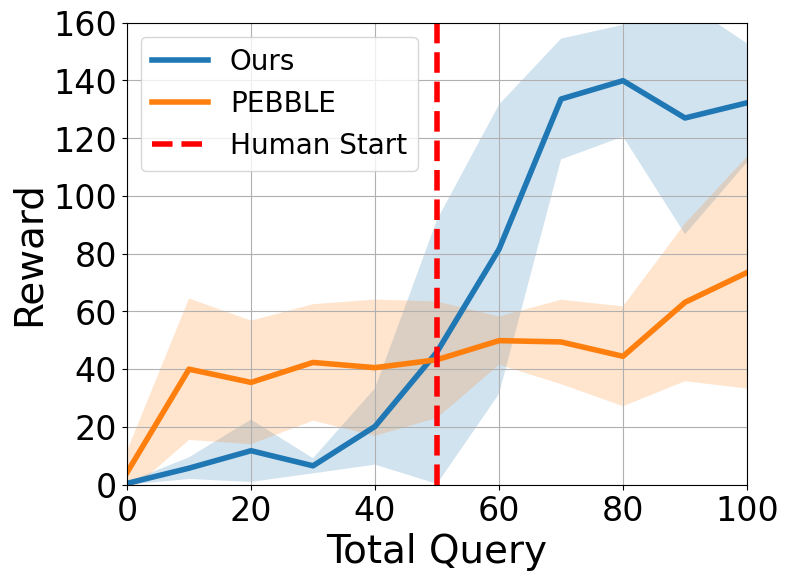

In [66]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Cartpole reward: 20% Error")
#plt.title("Cartpole-Swingup",fontsize = 16)
plt.plot(np.arange(0,11,1)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,11,1)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,11,1)*10,results_BT,label='PEBBLE',linewidth = l_wid)
plt.fill_between(np.arange(0,11,1)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.axvline(x=50, color='r', linestyle='--', label='Human Start',linewidth = l_wid)
plt.legend(fontsize=20)
plt.ylim(0,160)
plt.xlim(0,100)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Total Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)



plt.savefig('../Data/Figs/Human/cartpole.jpg',bbox_inches="tight")

In [67]:
results_ours =[]
for j in (2,3,4,5):
    res = np.load('../Data/Human_fb/Walker_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,21,1):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (2,3,4,5):
    res = np.load('../Data/Human_fb/Walker_BT_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,21,1):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

In [68]:
for i in range(10,21,2):
    print('mean',results_ours[i],'std',std_ours[i])

mean 181.68771 std 92.82789
mean 308.96368 std 33.393818
mean 301.88928 std 38.380966
mean 310.31787 std 41.69171
mean 331.35117 std 41.217236
mean 356.15652 std 66.00037


In [69]:
for i in range(10,21,2):
    print('mean',results_BT[i],'std',std_BT[i])

mean 131.25967 std 85.17786
mean 154.1627 std 78.88009
mean 175.48155 std 126.21638
mean 326.49072 std 15.288411
mean 200.12048 std 108.526596
mean 177.93518 std 123.63844


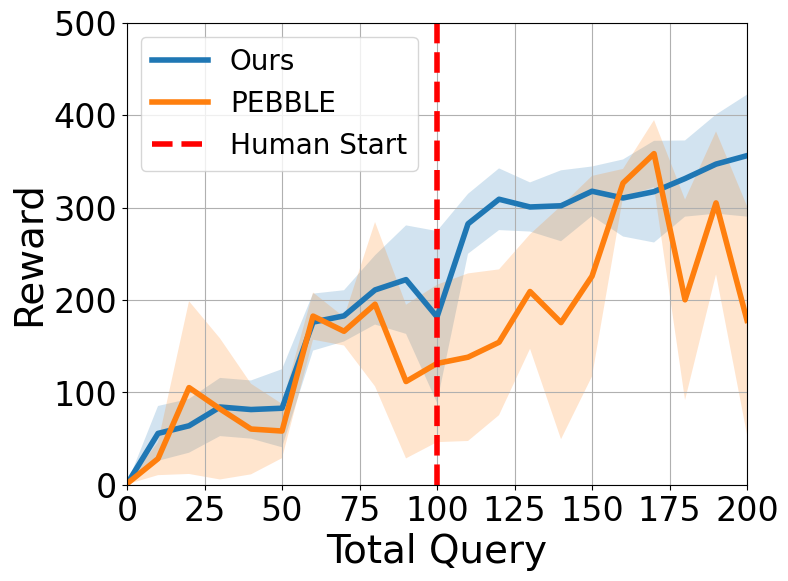

In [70]:
plt.figure(figsize=f_size)
plt.grid()
plt.plot(np.arange(0,21,1)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,21,1)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,21,1)*10,results_BT,label='PEBBLE',linewidth = l_wid)
plt.fill_between(np.arange(0,21,1)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.axvline(x=100, color='r', linestyle='--', label='Human Start',linewidth = l_wid)
plt.legend(fontsize=20)
plt.ylim(0,500)
plt.xlim(0,200)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Total Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/Human/walker.jpg',bbox_inches="tight")